![image.png](attachment:image.png)

_Alejandro de León Fernández_

_Aprendizaje Automático_

_Máster Universitario en Inteligencia Artificial_

# Actividad: Clasificación con máquinas de vectores de soporte y random forest

## Objetivos

Mediante esta actividad se pretende que ponga en práctica la creación de modelos basados en máquinas de vector de soporte y random forest. El objetivo es comprender de forma práctica con un problema determinado las diferencias que existen a la hora de entrenar los diferentes modelos.

- Comprender el tratamiento de datos que hay que realizar para los modelos de clasificación.
- Entender y aplicar el algoritmo de Random Forest a un problema de clasificación.
- Entender y aplicar el algoritmo de Support Vector Machine a un problema de clasificación.
- Evaluar y analizar los resultados de los clasificadores.
- Investigar la aplicación de los modelos de clasificación a problemas reales.


## Descripción de la actividad

Debes completar los espacios indicados en el notebook con el código solicitado y la respuesta, en función de lo que se solicite. Ten encuenta que las celdas vacías indican cuántas líneas debe ocupar la respuesta, por lo general no más de una línea.

El conjunto de datos con el que vamos a trabajar se encuentra en el siguiente enlace: https://archive.ics.uci.edu/dataset/31/covertype

Este dataset ha sido generado para predecir el tipo de cubierta forestal únicamente a partir de variables cartográficas (sin datos de sensores remotos). El tipo de cubierta forestal real para una observación determinada (celda de 30 x 30 metros) se determinó a partir de los datos del Sistema de información de recursos (RIS) de la Región 2 del Servicio Forestal de EE. UU. (USFS). Las variables independientes se derivaron de datos obtenidos originalmente del Servicio Geológico de EE. UU. (USGS) y de datos del USFS. Los datos están en forma original (no escalados) y contienen columnas binarias (0 o 1) de datos para variables cualitativas independientes (áreas silvestres y tipos de suelo).
Para ampliar información sobre el dataset y su origen, recomendamos leer la descripción completa del dataset en el enlace del repositorio. l.

El objetivo de la clasificación será detectar el tipo de suelo.

### Tareas que se deben realizar

- Análisis descriptivo de los datos:
   - Debe completarse el código solicitado y responder a las preguntas. Todo ello en el notebook dado como base.
- Clasificación:
  - Debe completarse el código solicitado y responder a las preguntas. Todo ello en el notebook dado como base.
- Investigación:
  - Buscar un artículo científico (https://scholar.google.es/) con un caso de uso de clasificación empleando una de las dos técnicas (o ambas) vistas en la actividad. Los artículos deben estar en revistas científicas, y deben ser posteriores a 2015. No debe utilizar técnicas de Deep Learning.
  - Para el artículo indicar:
    - Objetivo: cuál es el objetivo de la investigación, es decir a qué problema real está aplicando la clasificación.
    - Cómo utilizan las técnicas de clasificación, si realizan alguna adaptación de los algoritmos indicarse.
    - Principales resultados de la aplicación y de la investigación.


### Análisis descriptivo de los datos

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
# se carga el dataset
#df = pd.read_csv('covertype/covtype.csv')
cover_type = fetch_ucirepo(id=31)
df = pd.DataFrame(data=cover_type.data.features)
df2 = pd.DataFrame(data=cover_type.data.targets)
df = pd.concat([df, df2], axis=1)
df.head(5)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Soil_Type1                          581012 non-null 

In [ ]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,0.051434,0.436074,0.063627,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,0.220882,0.495897,0.244087,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [ ]:
df.shape

(581012, 55)

In [ ]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Soil_Type1',
       'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6',
       'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11',
       'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15',
       'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19',
       'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23',
       'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27',
       'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31',
       'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35',
       'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39',
       'Soil_Type40', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4

¿Cuántas instancias de datos tiene el dataset?

In [ ]:
## PON AQUÍ TU CÓDIGO
print(f"El dataset tiene {len(df)} instancias")

El dataset tiene 581012 instancias


El dataset contiene 581.012 instancias.

¿Cuántas variables continuas hay en el dataset?

In [ ]:
## PON AQUÍ TU CÓDIGO
columnas_continuas = df.select_dtypes(include=['float64', 'int64']).columns
print(f"El dataset tiene {len(columnas_continuas)} variables continuas")

El dataset tiene 55 variables continuas


 Todas las variables del dataset son continuas.

In [ ]:
columnas_categoricas = df.select_dtypes(include=['object']).columns
print(f"El dataset tiene {len(columnas_categoricas)} variables categoricas")

El dataset tiene 0 variables categoricas


¿Cuántas variables categóricas hay en el dataset? Indica las categorías.

No parece haber variables categóricas.

¿Cómo es la distribución de etiquetas de clase en el dataset? Con estos datos, ¿podríamos decir que el dataset está balanceado?

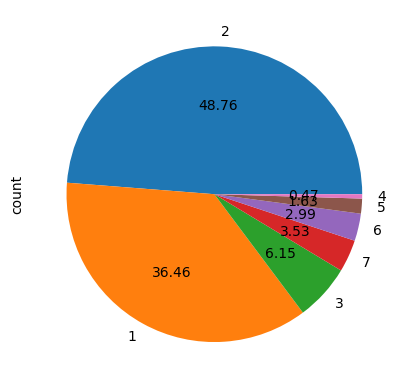

In [ ]:
## PON AQUÍ TU CÓDIGO
df['Cover_Type'].value_counts().plot(kind='pie',autopct='%.2f',)
plt.show()

Al observar el gráfico de tarta se aprecia que las clases 1 y 2 de Cover_Type tienen el mayor número de instancias por lo que el dataset esta desbalanceado.

¿Existen valores nulos o perdidos en el dataset?

In [ ]:
## PON AQUÍ TU CÓDIGO
df.isnull().sum()

,0
Elevation,0
Aspect,0
Slope,0
Horizontal_Distance_To_Hydrology,0
Vertical_Distance_To_Hydrology,0
Horizontal_Distance_To_Roadways,0
Hillshade_9am,0
Hillshade_Noon,0
Hillshade_3pm,0
Horizontal_Distance_To_Fire_Points,0


El dataset no contiene valores nulos tal y como se indica en la documentación.

¿Existe alguna variable altamente correlacionada con la variable de clase?

_Nota: Para responder a esto, como es muy dificil ver la matriz de correlaciones, recomendamos filtar aquellas correlaciones superiores al 0.80 con la variable de clase.

In [ ]:
## PON AQUÍ TU CÓDIGO
matriz_correlacion = df.corr()
print(matriz_correlacion['Cover_Type'].abs().sort_values(ascending=False))

Cover_Type                            1.000000
Wilderness_Area4                      0.323200
Elevation                             0.269554
Soil_Type10                           0.243876
Wilderness_Area1                      0.203913
Soil_Type38                           0.160170
Soil_Type39                           0.155668
Horizontal_Distance_To_Roadways       0.153450
Slope                                 0.148285
Soil_Type22                           0.141746
Soil_Type23                           0.135055
Soil_Type40                           0.128351
Soil_Type29                           0.124933
Soil_Type2                            0.118135
Soil_Type6                            0.112958
Horizontal_Distance_To_Fire_Points    0.108936
Soil_Type4                            0.099672
Hillshade_Noon                        0.096426
Soil_Type1                            0.090828
Soil_Type17                           0.090582
Vertical_Distance_To_Hydrology        0.081664
Soil_Type35  

¿Qué tres variables del dataset consideras que pueden influenciar más en la clasificación de los datos?¿Qué pruebas harías para comprobar tus hipótesis? Hazlas.

Según la matriz de correlación obtenida, las variables mas relacionadas con Cover_Type son 'Wilderness_Area4', 'Elevation' y 'Soil_Type10'.  

In [ ]:
# Separamos los datos en los conjuntos de entrenamiento y test.
from sklearn.model_selection import train_test_split

X, y = df.drop('Cover_Type',axis=1),df['Cover_Type']

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Clasificación

**Random Forest**

En esta parte de la actividad hay que utilizar la librería https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html para resolver el problema de clasificación.

El algortimo de RF necesitar ajustar una serie de hiperparámetros para realizar las clasificaciones. La implementación de sklearn nos da mucha flexibilidad para nuestros modelos. En general, para los problemas más comunes de clasificación, nos tenemos que preocupar de los siguientes hiperparámetros:
- n_estimators
- criterion
- max_depth
- min_samples_split
- min_samples_leaf
- max_features

Indica qué son cada uno de estos hiperparámetros

* n_stimators: Es el número de árboles que hay en el bosque del Random Forest. A mayor número de árboles aumenta el rendimiento del modelo pero también el tiempo de entrenamiento y el uso de memoria.
* criterion: Es el criterio que mide la calidad de la división en cada nodo del árbol. Se emplea para determinar cómo se evalua la calidad de las divisiones en los datos.
* max_depth: Este parámetro define la profundidad máxima de cada arbol del bosque. Hay que tenerlo en cuenta ya que un valor bajo puede causar underfitting y un valor muy alto puede causar overfitting.
* min_samples_split: Indica el número mínimo de muestras necesarias para dividir un nodo. Es importante ya que controla la creación de nodos. Los valores altos previenen divisiones excesivas reduciendo el overfitting.
* min_samples_leaf: Es el número mínimo de muestras necesarias en un nodo hoja. Los nodos hoja que tienen pocas muestras son susceptibles a ser muy específicos y pueden llevar a overfitting. Aumentar este parametro ayuda a simplicar el árbol.
* max_features: Es el número máximo de características que se tienen en cuenta al dividir un nodo. En ocasiones, limitar las características puede introducir aleatoriedad y mejorar la generalización, sobretodo en conjuntos grandes o en combinación con otros modelos como por ejemplo, Random Forests.

Además de los hiperparámetros que acabas de descubrir, la implementación de sklearn tiene el hiperparámetro _class_weight_

¿Qué indica ese parámetro? ¿Para qué puede ser útil?

El parámetro class_weight especifica como se pondera cada clase para la compensación de desbalanceos en la distribución de las etiquetas. Si una clase tiene un peso mayor, implica que los errores cometidos al clasificar ejemplos de esa clase seran peores.<br>Este parámetro es útil para manejar datasets desbalanceados, evitar el sesgo hacia otras clases mayoritarias o asignar mas peso a clases especificas.

Como primer paso para crear un clasificador de Random Forest hay que decidir si hay que hacer algún preprocesamiento adicional sobre los datos.
¿Hace falta normalizar los datos?

In [ ]:
## PON AQUÍ TU RESPUESTA Y/O CÓDIGO

No es necesario normalizar los datos para un clasificador Random Forest ya que divide los datos en funcion de unos umbrales especificos y no calcula distancias o gradientes como ocurre en las regresiones.

Entrena un conjunto de modelos de Random Forest que utilicen todas las variables del dataset, con 5, 10, 20, 50 y 100 árboles. El criterio para realizar las particiones debe ser Gini-index, la profundidad máxima de los árboles debe ser 10, el número mínimo de ejemplos para realizar una partición debe ser 10, el número mínimo de ejemplos para considerarlo una hoja debe ser 2, y el número máximo de características deben ser todas.

_Nota: el entrenamiento puede tardar entre 3 y 15 minutos en función de las características del equipo._

In [ ]:
# PON AQUÍ TU CÓDIGO PARA EL ENTRENAMIENTO

In [ ]:
from sklearn.metrics import accuracy_score

# numero de árboles: 5, 10, 20, 50 y 100
from sklearn.ensemble import RandomForestClassifier
params = {
    "criterion": "gini",
    "max_depth": 10,
    "min_samples_split": 10,
    "min_samples_leaf": 2,
    "max_features": None,
    "random_state": 42,
}

n_estimators_list = [5, 10, 20, 50, 100]

results = {}

for n in n_estimators_list:
    rf = RandomForestClassifier(n_estimators=n, **params)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[n] = accuracy

for n, acc in results.items():
    print(f"Random Forest con {n} árboles: Precisión = {acc:.4f}")

Random Forest con 5 árboles: Precisión = 0.7967
Random Forest con 10 árboles: Precisión = 0.7972
Random Forest con 20 árboles: Precisión = 0.7959
Random Forest con 50 árboles: Precisión = 0.7963
Random Forest con 100 árboles: Precisión = 0.7965


Visualiza la matriz de confusión del modelo entrenado con 20 árboles.

In [ ]:
## PON AQUÍ TU CÓDIGO

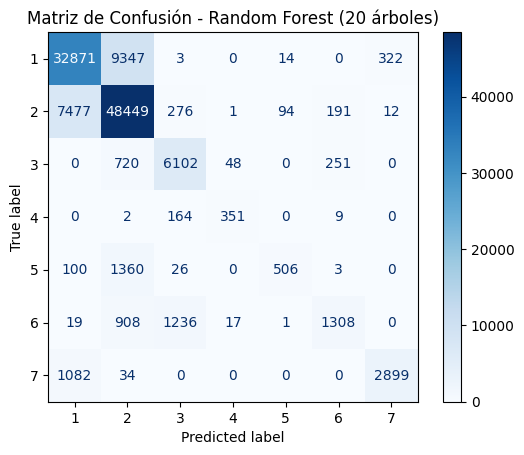

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

rf_20 = RandomForestClassifier(n_estimators=20, **params)
rf_20.fit(X_train, y_train)
y_pred_20 = rf_20.predict(X_test)

cm = confusion_matrix(y_test, y_pred_20)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_20.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión - Random Forest (20 árboles)")
plt.show()

¿Cuántos ejemplos ha clasificado correctamente?

Para determinar los ejemplos clasificados correctamente nos fijamos en los valores de la diagonal principal de la matriz de confusión. Los resultados obtenidos son:<br>
Clase 1: 32871<br>
Clase 2: 48449<br>
Clase 3: 6102<br>
Clase 4: 351<br>
Clase 5: 506<br>
Clase 6: 1308<br>
Clase 7: 2899<br>
Si sumamos estos valores obtenemos un total de **92.486** ejemplos clasificados de manera correcta.

Explica cómo funciona la clasificación para cada una de las 7 clases. ¿Hay alguna clase que clasifica mejor que otras?<br>
Si dividimos los ejemplos correctamente clasificados entre en el total de ejemplos reales obtenemos la precision para cada clase:

Clase 1: 77,2%<br>
Clase 2: 85,7%<br>
Clase 3: 85,7%<br>
Clase 4: 66,7%<br>
Clase 5: 25,4%<br>
Clase 6: 37,5%<br>
Clase 7: 72,2%<br>
Las clases 2 y 3 obtienen las mejores precisiones por lo que el modelo las identiica con mas exactitud. Por otro lado la clase 5 tiene la peor precision indicando que el modelo tiene dificultades para distinguirla de otras clases.Para solucionarlo se puede considerar usar tecnicas de rebalanceo.

¿Cuál de todos los modelos que has entrenado obtiene mejores resultados de precisión para el conjunto de datos de test?

_Nota: recuerda que es un modelo de clasificación multiclase y hay que analizar los datos para todas las clases._

In [ ]:
## PON AQUÍ TU CÓDIGO Y RESPUESTA

Selecciona el modelo que consideras que obtiene mejores resultados para los resultados de test. Explica por qué consideras que ese modelo es el que mejor resultados obtiene.

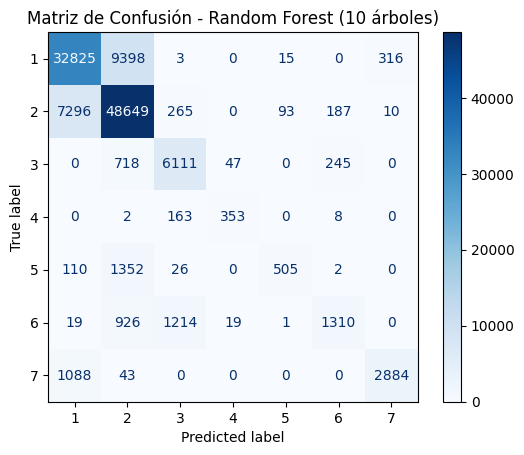

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

rf_20 = RandomForestClassifier(n_estimators=10, **params)
rf_20.fit(X_train, y_train)
y_pred_20 = rf_20.predict(X_test)

cm = confusion_matrix(y_test, y_pred_20)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_20.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión - Random Forest (10 árboles)")
plt.show()

Visualiza la matriz de confusión de los datos de test de este modelo.
- ¿Cuántos ejemplos ha clasificado bien el modelo?
- ¿Cuántos ejemplos ha clasificado de manera errónea?


In [ ]:
import numpy as np
correctos = np.trace(cm)
total = np.sum(cm)
errores = total - correctos
print(f"Ejemplos clasificados correctamente: {correctos}")
print(f"Ejemplos clasificados de manera erronea: {errores}")

Ejemplos clasificados correctamente: 92637
Ejemplos clasificados de manera erronea: 23566


Visualiza los valores de precision, recall, f1 para cada una de las clases.
- ¿Clasifica de igual manera todas las clases o hay alguna para la que el modelo tiene una mayor capacidad predictiva?

In [ ]:
### PON AQUÍ TU CÓDIGO E INDICA TU RESPUESTA

**Support Vector Machine**

In [ ]:
# Importamos las librerías para utilizar las máquinas de vector de soportes.
# Utilizaremos la librería svm:

from sklearn import svm

#Cargamos también las librerías para hacer la matriz de confusión y la cross validation:

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

Para la implementación del modelo de clasificación de SVM usaremos la clase Support Vector Classifier de sklearn, https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

El algoritmo de SVM necesita ajustar una serie de hiperparámetros para realizar las clasificaciones. La implementación de sklearn nos da mucha flexibilidad para nuestros modelos. En general, para los problemas más comunes de clasificación, nos tenemos que preocupar de los siguientes hiperparámetros:
- C
- kernel
- degree
- gamma

Indica qué son cada uno de estos hiperparámetros

* C: Este parámetro controla el equilibro entre maximizar el margen y minimizar el error de clasificación para el conjunto de entrenamiento.
* Kernel: Este parámetro define la función que el modelo SVM emplea para transformar los datos a un espacio de mas dimensiones en el que sean linealmente separables.
* Degree: Este parámetro establece el grado del polinomio cuando se usa el kernel polinómico 'poly'.
* Gamma: Este parámetro establece cuanto influye un solo punto de datos sobre el modelo, afectando a la forma de las regiones de clasificación.

Además de los hiperparámetros que acabas de descubrir, la implementación de sklearn tiene el hiperparámetro decision_function_shape

¿Qué indica ese parámetro? ¿Para qué puede ser útil?

Este parámetro controla la forma en la que se calcula la función de decisión para clasificación multiclase. Los valores posibles son 'ovo' (one-vs-one) y 'ovr' (one-vs-rest). Esto puede ser útil para ajustar como el modelo maneja las clasificaciones multiclase dependiendo de cual sea el problema que se va a tratar.

Tenemos un dataset de más de medio millón de instancias, y para el objetivo de la actividad no hacen falta tantas. Por eso, antes de aplicar SVM vamos a reducir el número de instancias. SVM requiere una gran carga computacional y con ese volumen de instancias el tiempo requerido sería demasiado elevado.

In [ ]:
df = df.head(50000)

Nota: recuerda revisar que esta manera de seleccionar un subconjunto de instancias no altera la clase objetivo. Deberías tener un porcentaje similar de instancias de cada clase. Si no fuera así, deberás cambiar la manera de seleccionar el subconjunto.

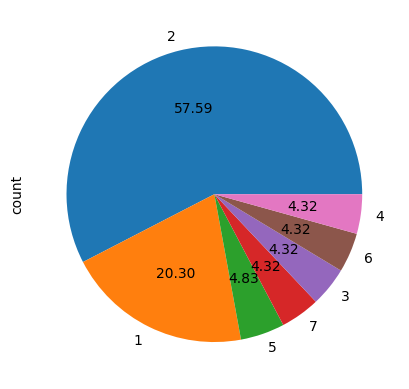

In [ ]:
df['Cover_Type'].value_counts().plot(kind='pie',autopct='%.2f',)
plt.show()

In [ ]:
# Con el nuevo número de instancias, separamos los datos en los conjuntos de entrenamiento y test.
from sklearn.model_selection import train_test_split

X, y = df.drop('Cover_Type',axis=1),df['Cover_Type']

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Como primer paso para crear un clasificador de SVM hay que decidir si hay que hacer algún preprocesamiento adicional sobre los datos. ¿Hace falta normalizar los datos?

In [ ]:
## PON AQUÍ TU CÓDIGO SI CONSIDERAS QUE HAY QUE NORMALIZAR LOS DATOS

from sklearn.preprocessing import StandardScaler
from pandas import DataFrame


scaler = StandardScaler()

## COMPLETAR

X_scaled = scaler.fit_transform(X)
X_scaled = DataFrame(X_scaled, columns=X.columns)

Entrena un conjunto de modelos de SVM que utilicen todas las variables del dataset, con C = 0.1 hasta 1000 con cinco valores diferentes; kernel radial, y gamma con valor scale.

In [ ]:
from sklearn.svm import SVC

C = [0.1, 1, 10, 100, 1000]
kernel = 'rbf'
gamma = 'scale'

svc = [SVC(C=i, kernel=kernel, gamma=gamma) for i in C]
svc

[SVC(C=0.1), SVC(C=1), SVC(C=10), SVC(C=100), SVC(C=1000)]

In [ ]:
results = {}

for i, model in enumerate(svc):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[C[i]] = accuracy

for c, acc in results.items():
    print(f"SVM con C = {c}: Precisión = {acc:.4f}")

SVM con C = 0.1: Precisión = 0.7215
SVM con C = 1: Precisión = 0.7913
SVM con C = 10: Precisión = 0.8081
SVM con C = 100: Precisión = 0.8258
SVM con C = 1000: Precisión = 0.8400


In [ ]:
### PON AQUÍ TU CÓDIGO

In [ ]:
score

Después de hacer el entrenamiento, visualiza las matrices de confusión de los modelos entrenados.

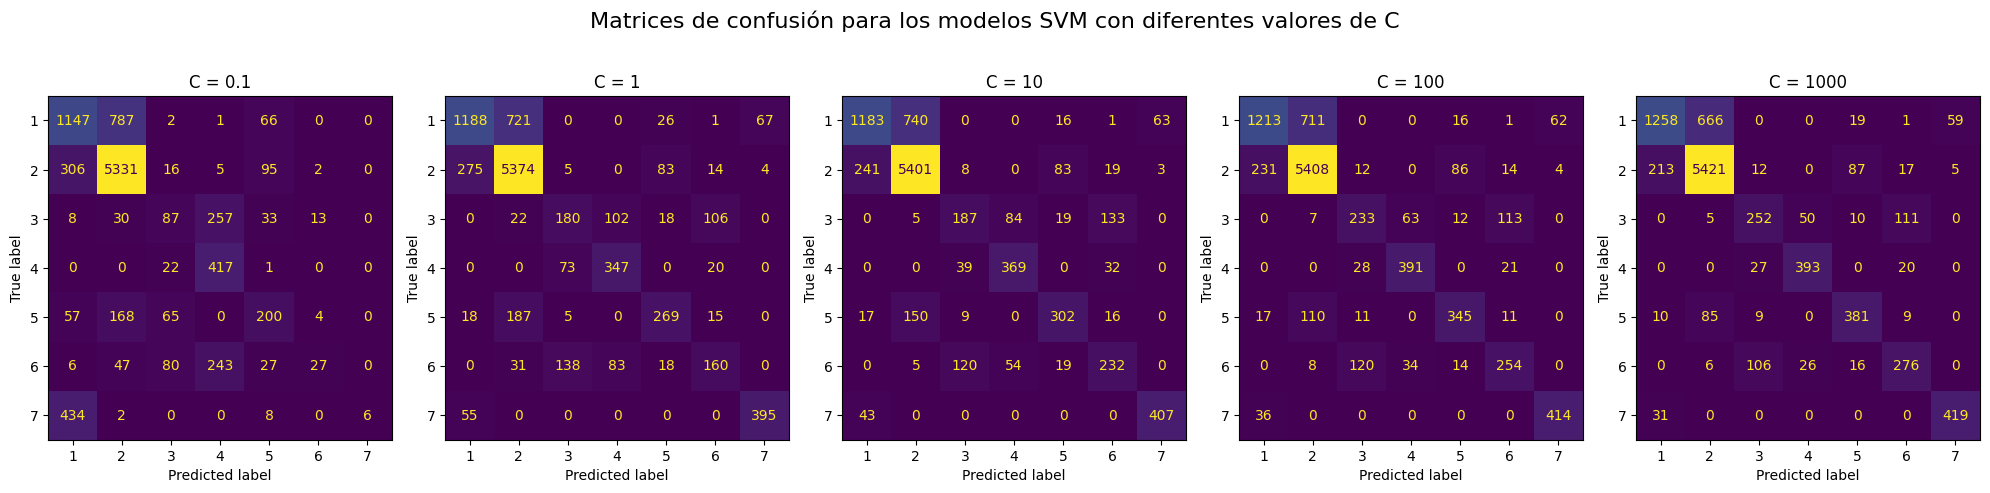

In [ ]:
## PON AQUÍ TU CÓDIGO
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, len(C), figsize=(20, 5))
fig.suptitle("Matrices de confusión para los modelos SVM con diferentes valores de C", fontsize=16)

for i, model in enumerate(svc):
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
    disp.plot(ax=axes[i], colorbar=False)
    axes[i].set_title(f"C = {C[i]}")

plt.tight_layout()
plt.show()

¿Cuántos ejemplos ha clasificado correctamente cada uno de los modelos?

El modelo con **C=0,1** ha clasificado 7.215 ejemplos correctamente.<br>
El modelo con **C=1** ha clasificado 7.913 ejemplos correctamente.<br>
El modelo con **C=10** ha clasificado 8.081 ejemplos correctamente.<br>
El modelo con **C=100** ha clasificado 8.258 ejemplos correctamente.<br>
El modelo con **C=1000** ha clasificado 8.400 ejemplos correctamente.<br>

¿Cuál de todos los modelos que has entrenado obtiene mejores resultados de precision para todas las clases? Si no hay ninguno que consideres que sea óptimo, explica cómo se comporta para cada clase el modelo que consideres que tiene mejores resultados.

In [ ]:
## PON AQUÍ TU CÓDIGO

Tal y como se aprecia en la matriz de confusion anterior, el modelo entrenado que obtiene mejores resultados de precisión para todas las clases es el de C=1000.

Selecciona el modelo que consideras que obtiene mejores resultados y realiza las predicciones con el conjunto de datos de test.

In [ ]:
## PON AQUÍ TU CÓDIGO
modelo_svm = SVC(C=1000, kernel='rbf', gamma='scale')
modelo_svm.fit(X_train, y_train)
y_pred = modelo_svm.predict(X_test)

Visualiza la matriz de confusión de los datos de test.
- ¿Cuántos ejemplos ha clasificado bien el modelo?
- ¿Cuántos ejemplos ha clasificado de manera errónea?

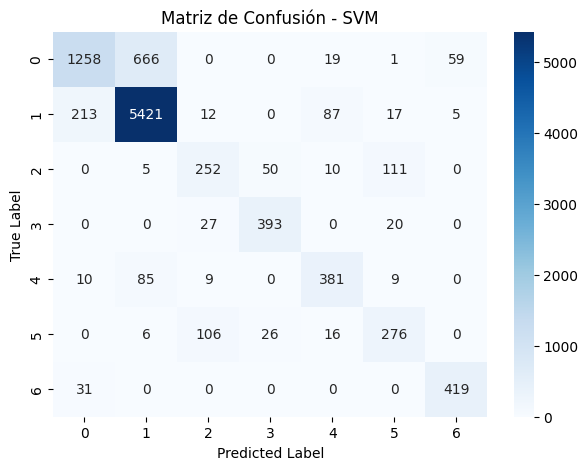

In [ ]:
### PON AQUÍ TU CÓDIGO E INDICA TU RESPUESTA
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)

plt.title("Matriz de Confusión - SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
import numpy as np
correctos = np.trace(cm)
total = np.sum(cm)
errores = total - correctos
print(f"Ejemplos clasificados correctamente: {correctos}")
print(f"Ejemplos clasificados de manera erronea: {errores}")

Ejemplos clasificados correctamente: 8400
Ejemplos clasificados de manera erronea: 1600


Visualiza los valores de precision, recall, f1 para cada una de las clases.
- ¿Clasifica de igual manera todas las clases o hay alguna para la que el modelo tiene una mayor capacidad predictiva?

In [ ]:
### PON AQUÍ TU CÓDIGO E INDICA TU RESPUESTA
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))


Reporte de clasificación:
              precision    recall  f1-score   support

           1       0.83      0.63      0.72      2003
           2       0.88      0.94      0.91      5755
           3       0.62      0.59      0.60       428
           4       0.84      0.89      0.86       440
           5       0.74      0.77      0.76       494
           6       0.64      0.64      0.64       430
           7       0.87      0.93      0.90       450

    accuracy                           0.84     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.84      0.84      0.84     10000



El modelo tiene una mejor capacidad predictiva para la **Clase 2** con una precisión de 0,88, un recall de 0,94 y un F1-score de 0,91. La **Clase 7** tambien muestra un buen desempeño con un F1-score del 0,90, una precisión del 87% y un recall alto de 0,93.<br>
Para las **Clases 3 y 6** el modelo tiene peor capacidad de predicción.

**Comparativa**

En base al EDA realizado, a las decisiones tomadas sobre los datos e hiperparámetros y a las características computacionales de tu equipo. ¿Qué modelo obtiene mejores resultados de clasificación?

En general, Random Forest con 20 árboles parece ser el modelo que mejores resultados globales obtiene debido a que muestra un equilibrio entre la precisión, la robustez y los tiempos de entrenamiento, se adapta ien a los datos desbalanceados y tiene un desempeño constante para todas las clases.<br>
Por otro lado, el SVM con kernel radial también obtiene buenos resultados, pero su desempeño es inferior en clases desbalanceadas y requiere de más ajustes en el preprocesamiento de los datos y el ajuste de hiperparámetros.

### Investigación

Buscar un artículo científico (https://scholar.google.es/) con un caso de uso de clasificación empleando una de las dos técnicas (o ambas) vistas en la actividad. Los artículos deben estar en revistas científicas, y deben ser posteriores a 2015. No debe utilizar técnicas de Deep Learning.

Baron, C., & Froelich, M. (2023). Sentiment analysis and random forest to classify LLM versus human source applied to scientific texts. arXiv. https://doi.org/10.48550/arXiv.2404.08673

título, autores, revista, año de publicación

Objetivo: cuál es el objetivo de la investigación, es decir a qué problema real está aplicando la clasificación.
Técnicas de clasificación empleadas y si realiza alguna adaptación.
Principales resultados de la aplicación y de la investigación.

El objetivo de la investigación es la clasificación de textos científicos generados por modelos de lenguaje LLM y escritos por humanos. Con esto se pretende detectar posibles fraudes academicos o plagios, especialmente en entornos donde se crean textos extensos que podrian ser generados por modelos de inteligencia artificial en vez de por humanos. La clasificacion tiene aplicaciones prácticas en analisis del contenido cientifico, evaluaciones academicas y control de calidad en publicaciones academicas.<br>
Las técnicas de clasificacion empleadas han sido el analisis de sentimientos, como herramienta para identificar caracteristicas lingüisticas que puedan diferenciar textos escritos manualmente de textos generados por modelos y el clasificador Random Forest para clasificar en dos categorias: 'generado por LLM' y 'generado por humano'. Se eligio Random Forest por su capacidad para manejar grandes caracteristicas y su eficacia en tareas de clasificación.<br>
El modelo tuvo un alto rendimiento al clasificar los textos cientificos, con una elevada precision distinguiendo los generados por LLM y humanos. El analisis de los sentimientos revelo que algunas caracteristicas lingüisticas, como el uso de palabras y la sintaxis son muy importantes para realizar una clasificación precisa. También obtuvo grandes resultados enfrentandose a textos técnicos y cientificos, que en este caso es relevante para el caso de estudio.